In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install -q gwpy

In [8]:
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'
!wget -q 'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth'

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-h94u9ikz
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-h94u9ikz
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done


In [2]:

!pip install ultralytics
!cp /content/drive/MyDrive/DentalImages/YOLO_dataset.zip /content/
!unzip YOLO_dataset.zip

In [17]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/DentalImages/TrainingCheckpoints/best_yolov8.pt")
results = model.predict("/content/YOLO_dataset/images/val/90.png")
for r in results:
  print(r.boxes.xyxy)


image 1/1 /content/YOLO_dataset/images/val/90.png: 256x640 23 tooths, 96.5ms
Speed: 2.9ms preprocess, 96.5ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)
tensor([[ 629.6802,  452.3073,  890.3275,  748.6429],
        [1885.1708,  446.2553, 2110.9033,  746.4713],
        [ 821.3353,  485.4437, 1051.8462,  768.1843],
        [ 797.0605,  182.7436,  956.8037,  459.3946],
        [1492.6251,  129.0932, 1596.2637,  451.1989],
        [1604.1809,  464.5600, 1699.4633,  786.9694],
        [1773.8264,  474.9903, 1942.7638,  768.4013],
        [1255.8872,  162.7481, 1342.2493,  451.7263],
        [1147.4524,  135.6102, 1254.1920,  471.3106],
        [1000.7717,  493.5790, 1133.7253,  783.1207],
        [1092.6664,  492.0859, 1229.3243,  806.6972],
        [1608.0464,  162.3024, 1706.4960,  449.7198],
        [1059.0483,  187.1227, 1147.2860,  473.8813],
        [1222.1478,  473.1762, 1323.8234,  788.8219],
        [1338.3708,  109.6381, 1459.3484,  445.2846],
        [1325.3

In [15]:
!pip install pydantic==1.10.13

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.5 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.14
    Uninstalling pydantic-1.10.14:
      Successfully uninstalled pydantic-1.10.14
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [10]:
!wget -q 'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth'

In [11]:
from segment_anything import sam_model_registry
sam_model = sam_model_registry['vit_b'](checkpoint='sam_vit_b_01ec64.pth')

In [13]:
import torch
optimizer = torch.optim.Adam(sam_model.mask_decoder.parameters())
loss_fn = torch.nn.MSELoss()

In [89]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def get_fixed_coordinates(box, image):
  x_center = box[0].numpy()
  y_center = box[1].numpy()
  width = box[2].numpy()
  height = box[3].numpy()

  x_center *= image.shape[1]
  y_center *= image.shape[0]
  width *= image.shape[1]
  height *= image.shape[0]
  print(x_center, x_center.dtype)
  x1 = int(x_center - width / 2)
  y1 = int(y_center - height / 2)
  x2 = int(x_center + width / 2)
  y2 = int(y_center + height / 2)

  return x1, y1, x2, y2

image = np.float32(cv2.imread("/content/YOLO_dataset/images/val/90.png")/255.0)

image = cv2.resize(image, (1024,1024))
image = torch.from_numpy(image)
image = image.reshape((1,image.shape[2], image.shape[0], image.shape[1]))

print(image.shape, image.dtype)
with torch.no_grad():
  image_embedding = sam_model.image_encoder(image)
  results = model.predict("/content/YOLO_dataset/images/val/90.png")
  boxes = results[0].boxes.xywhn
  box_list = []
  for box in boxes:
    x1, y1, x2, y2 = get_fixed_coordinates(box,image)
    box_list.append([x1, y1, x2, y2])
  box_tensor = torch.tensor(box_list)
  sparse_embeddings, dense_embeddings = sam_model.prompt_encoder(
            points=None,
            boxes=box_tensor,
            masks=None,
        )

torch.Size([1, 3, 1024, 1024]) torch.float32

image 1/1 /content/YOLO_dataset/images/val/90.png: 256x640 23 tooths, 93.6ms
Speed: 2.3ms preprocess, 93.6ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)
0.7862108 float32
2.066935 float32
0.968887 float32
0.9071712 float32
1.5977011 float32
1.7087814 float32
1.9223742 float32
1.3438637 float32
1.2422299 float32
1.1040503 float32
1.2010298 float32
1.7144184 float32
1.1412075 float32
1.3168817 float32
1.4470962 float32
1.4062753 float32
1.6099162 float32
1.4799833 float32
1.043447 float32
1.8470106 float32
1.5282772 float32
1.8531079 float32
1.0417788 float32


In [90]:
low_res_masks, iou_predictions = sam_model.mask_decoder(
  image_embeddings=image_embedding,
  image_pe=sam_model.prompt_encoder.get_dense_pe(),
  sparse_prompt_embeddings=sparse_embeddings,
  dense_prompt_embeddings=dense_embeddings,
  multimask_output=False,
)

In [92]:

from torch.nn.functional import threshold, normalize

upscaled_masks = sam_model.postprocess_masks(low_res_masks, (1024,1024),(1150,2900) ).to("cpu")

binary_mask = normalize(threshold(upscaled_masks, 0.0, 0)).to("cpu")



In [103]:
gt_mask = torch.from_numpy(np.float32(np.zeros((23,1,1150,2900))))
print(gt_mask.dtype, binary_mask.dtype)
loss = loss_fn(binary_mask, gt_mask)
optimizer.zero_grad()
loss.backward()
optimizer.step()

torch.float32 torch.float32


(1150, 2900, 3)

image 1/28 /content/YOLO_dataset/images/val/100.png: 256x640 32 tooths, 379.4ms
image 2/28 /content/YOLO_dataset/images/val/101.png: 288x640 30 tooths, 172.8ms
image 3/28 /content/YOLO_dataset/images/val/102.png: 288x640 24 tooths, 177.7ms
image 4/28 /content/YOLO_dataset/images/val/103.png: 288x640 23 tooths, 173.5ms
image 5/28 /content/YOLO_dataset/images/val/104.png: 288x640 26 tooths, 184.1ms
image 6/28 /content/YOLO_dataset/images/val/105.png: 288x640 28 tooths, 180.1ms
image 7/28 /content/YOLO_dataset/images/val/106.png: 256x640 30 tooths, 169.3ms
image 8/28 /content/YOLO_dataset/images/val/107.png: 288x640 30 tooths, 165.6ms
image 9/28 /content/YOLO_dataset/images/val/108.png: 288x640 21 tooths, 173.0ms
image 10/28 /content/YOLO_dataset/images/val/109.png: 288x640 31 tooths, 193.3ms
image 11/28 /content/YOLO_dataset/images/val/110.png: 288x640 25 tooths, 183.6ms
image 12/28 /content/YOLO_dataset/images/val/111.png: 288x640 29 tooths, 194.6ms
image 13/28 /content

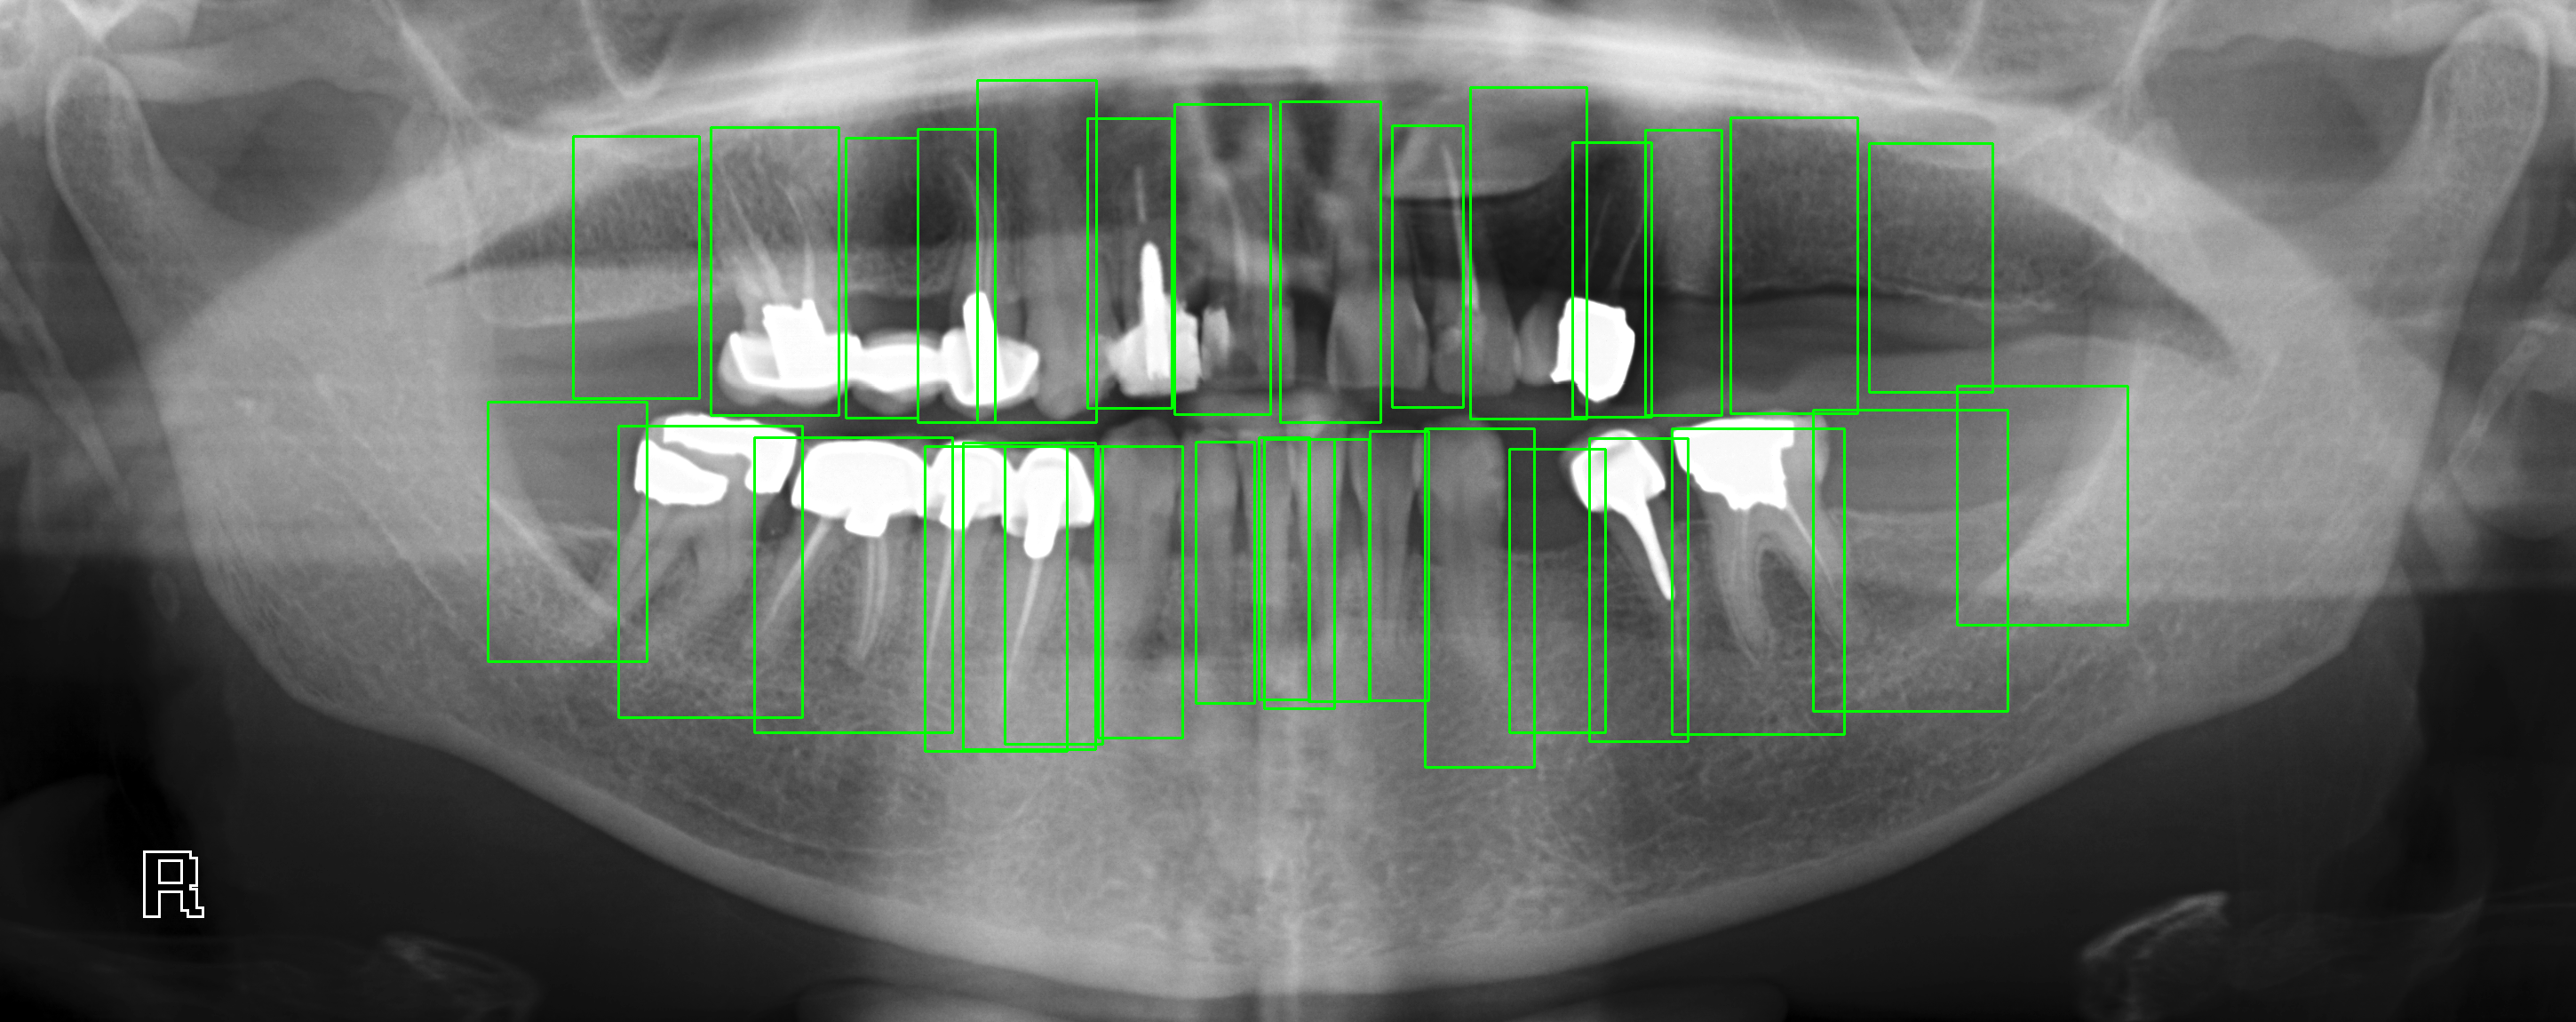

In [91]:
image = cv2.imread("/content/YOLO_dataset/images/val/90.png")
print(image.shape)
# image = cv2.resize(image, (1024,1024))
results = model.predict("/content/YOLO_dataset/images/val/")
boxes = results[0].boxes.xywhn
print(len(results))
for box in boxes:
  # print(box)
  # x1 = int(np.floor(box[0]).numpy())
  # y1 = int(np.floor(box[1]).numpy())
  # x2 = int(np.floor(box[2]).numpy())
  # y2 = int(np.floor(box[2]).numpy())

  x_center = box[0].numpy()
  y_center = box[1].numpy()
  width = box[2].numpy()
  height = box[3].numpy()

  x_center *= image.shape[1]
  y_center *= image.shape[0]
  width *= image.shape[1]
  height *= image.shape[0]

  x1 = int(x_center - width / 2)
  y1 = int(y_center - height / 2)
  x2 = int(x_center + width / 2)
  y2 = int(y_center + height / 2)
  print(x1,y1,x2,y2)

  cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
cv2_imshow(image)